## <center> Homework 2 </center>
 #### <center> Tara Wilson </center>
 <center> DATA 558 </center>
 <center> April 12, 2019 </center>

In [1]:
# imports
import math
import pandas as pd
import numpy as np
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Exercise 1

#### 1.1 Remarks

#### 1.2 Gradient Descent

**Assume that _d = 1_ and _n = 1_. The sample is then of size 1 and boils down to just _(x, y)_. The function *F* writes simply as $$F(\beta) = (y-x\beta)^2 + \lambda\beta^2$$  Compute and write down the gradient $\nabla F$ of F.**

To find the gradient of $\nabla F$ of $F$, we must take the derivative.  

With _n = 1_ and _d = 1_ the equation simplifies to:  
$F(\beta) = (y-x\beta)^2 + \lambda\beta^2$  

From here, we can write out what we need to do to solve for the gradient:  
$F'(\beta) = \frac{\partial}{\partial \beta} ((y-x\beta)^2 + \lambda\beta^2)$  

We can derive the first term by applying chain rule and the second term by solving a simple derivative:  
$\frac{\partial}{\partial \beta} (y-x\beta)^2 = (2)(-x) * (y-x\beta)(1)$

The second term is a simple derivative:  
$\frac{\partial}{\partial \beta} \lambda\beta^2 = 2\lambda\beta$

Finally we can combine terms and simplify and we are left with the gradient:  
$\nabla F = -2x (y-x\beta) + 2\lambda\beta$  

**Assume now that _d > 1_ and _n > 1_. Using the previous result and the linearity of differentiation, compute and write down the gradient $\nabla F(\beta)$ of *F*.** 

With _n > 1_ and _d > 1_ the equation starts as:    
$F(\beta) = \frac{1}{n} \sum_{i=1}^{n} (y_i - x_i^T \beta)^2 + \lambda ||\beta||_2^2$  

We will approach this problem in parts, treating the first term and second terms independently before combining back together:  
$g(\beta) = \frac{1}{n} \sum_{i=1}^{n} (y_i - x_i^T \beta)^2$  
$h(\beta) = \lambda ||\beta||_2^2$   

Looking first at $g'(\beta)$:  
$g'(\beta) = \frac{1}{n} \frac{\partial}{\partial \beta} (||Y -X^T \beta||)_2^2 $  

Since we know the result is a n x 1 vector, we can rewrite this as:  
$g'(\beta) = \frac{1}{n} \frac{\partial}{\partial \beta} ((Y -X^T \beta)^T(Y -X^T \beta)) $  

From here, we can foil our terms out:  
$g'(\beta) = \frac{1}{n} \frac{\partial}{\partial \beta} (Y^TY - Y^TX^T\beta - (X^T\beta)^TY + (X^T\beta)^TX^T\beta) $ 

We can apply the identity $(X^T\beta)^T = \beta^TX$ to simplify our equation and rewrite in individual terms:    
$g'(\beta) = \frac{1}{n} \frac{\partial}{\partial \beta} (Y^TY - Y^TX^T\beta - \beta^TXY + \beta^TXX^T\beta) $   
$g'(\beta) = \frac{1}{n} (\frac{\partial}{\partial \beta}Y^TY - \frac{\partial}{\partial \beta}Y^TX^T\beta - \frac{\partial}{\partial \beta}\beta^TXY + \frac{\partial}{\partial \beta}\beta^TXX^T\beta)$

The first term will drop since the derivative of $Y^TY$ with respect to $\beta$ is 0. Now we can solve each term individually and then combine them back together.  

Using the given identity that $\frac{\partial}{\partial x} (a^Tx) = \frac{\partial}{\partial x} (x^Ta) = a$, we can solve the first term (with $\beta = x$ and $XY = a$):  
$\frac{\partial}{\partial \beta}Y^TX^T\beta = \frac{\partial}{\partial \beta} (XY)^T \beta = XY$      

We can use the same identiy to solve the second term:    
$\frac{\partial}{\partial \beta}\beta^TXY = XY$    

Finally, we will derive the third term. Here we need to use the given identity that $\frac{\partial}{\partial x} x^TAx = (A + A^T)x$ with $x = \beta$ and $A = XX^T$:
$\frac{\partial}{\partial \beta}\beta^TXX^T\beta = (XX^T + (XX^T)^T)\beta = (XX^T + XX^T)\beta = 2XX^T\beta$  

We can put this all back together and have the final $g'(\beta)$ term and simplify:  
$g'(\beta) = \frac{1}{n} (-XY - XY + 2XX^T\beta) = \frac{-2X}{n} (Y - X^T\beta)$

Now, solving for $h'(\beta)$, we will again use the identity that $\frac{\partial}{\partial x} x^TAx = (A + A^T)x$ where $A$ is the identity matrix and $x = \beta$:  
$h'(\beta) = \lambda \frac{\partial}{\partial \beta} ||\beta||_2^2 = \lambda \frac{\partial}{\partial \beta} \beta^T (A) \beta = \lambda (A^T * A) \beta = \lambda 2 \beta$

We can add the $g'(\beta)$ and $h'(\beta)$ terms back together and arrive at our final result:   
$\nabla F = \frac{-2X}{n} (Y - X^T\beta) + 2\lambda\beta$

**Consider the `Hitters` dataset, which you should load and divide into training and test sets using the code below.**  

In [2]:
# Load the data
hitters = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/Hitters.csv", sep=",", header=0)
hitters = hitters.dropna()

# Create our X matrix with the predictors and y vector with the response
X = hitters.drop("Salary", axis=1)
X = pd.get_dummies(X, drop_first=True)
y = hitters["Salary"]

# Divide the data into training and test sets. By default, 25% goes into the test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

**Standardize the data. Note that you can convert a data frame into an array by using `np.array()`.**

In [3]:
#converting data into arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train).reshape(197, 1)
y_test = np.array(y_test).reshape(66, 1)

# standardizing X by subtracting the mean of the predictors and dividing by their standard deviation
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# standardizing Y by subtracting the mean of the predictors and dividing by their standard deviation
scaler = preprocessing.StandardScaler().fit(y_train)
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

**Write a function _computegrad_ that computes and returns $\nabla F(\beta)$ for any $\beta$. Avoid using `for` loops by vectorizing the computation**

In [4]:
def computegrad(X, y, beta, lamb = 0.05):
    """
    Computes the gradient for ridge regression problem
    Inputs:
        - X: matrix of X values
        - y: vector of associated outcomes
        - beta: vector of beta constants
        - lambda: scalar multiplicative factor for regularization penalty (optional, defaults to 0.05)
    Outputs:
        - vector gradient for passed in parameters
    """
    n = len(X)
    regularization = 2 * lamb * beta
    residuals = y - X.dot(beta)
    return (-2/n) * X.T.dot(residuals) + regularization

**Write a function _graddescent_ that implements the gradient descent algorithm described in Algorithm 1. The function _graddescent_ calls the function _computegrad_ as a subroutine. The function takes as input the initial point, the constant step-size value, and the maximum number of iterations. The stopping criterion is the maximum number of iterations.**

In [5]:
def computeobj(X, y, beta, lamb = 0.05):
    """
    Computes the objective for ridge regression problem
    Inputs:
        - X: matrix of X values
        - y: vector of associated outcomes
        - beta: vector of beta constants
        - lambda: scalar multiplicative factor for regularization penalty (optional, defaults to 0.05)
    Outputs:
        - objective for passed in parameters
    """
    n = len(X)
    residual = y - X.dot(beta)
    return (((1/n) * np.sum(residual**2)) + (lamb * np.sum(beta**2)))

In [6]:
def graddescent(X, y, beta, stepSize = 0.05, maxIterations = 1000):
    """
    Runs the gradient descent for ridge regression problem with fixed step size
    Inputs:
        - X: matrix of X values
        - y: vector of associated outcomes
        - beta: vector of beta constants
        - stepSize: scalar step size
        - maxIterations: maximum number of iterations to perform
    Outputs:
        - vector of improved betas after final iteration
        - vector of objective values for each iteration
    """
    x = X
    betas = np.zeros((maxIterations, len(beta)))
    objs = np.zeros((maxIterations, 1))
    iteration = 0
    b = beta
    while iteration < maxIterations: # stop at maxInterations
        obj = computeobj(x, y, b)
        b = b - stepSize * computegrad(x, y, b) # updates beta with new gradient
        objs[iteration, :] = obj # saves current objective value
        betas[iteration,:] = b.T # saves current beta values
        iteration += 1
    return betas, objs

**Set the constant step-size to _η = 0.05_ and the maximum number of iterations to 1000. Run _graddescent_ on the training set of the `Hitters` dataset for _λ = 0.05_. Plot the curve of the objective value $F(\beta_t)$ versus the iteration counter *t*. (Again, avoid using `for` loops when computing the objective values). What do you observe?**

In [7]:
betas, objs = graddescent(X_train, y_train, np.zeros((19,1)))

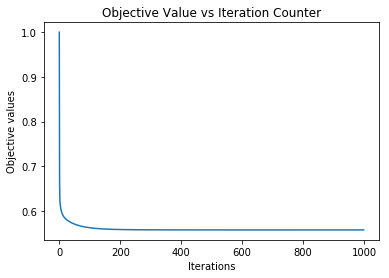

In [8]:
plt.plot(objs)
plt.ylabel("Objective values")
plt.xlabel("Iterations")
plt.title("Objective Value vs Iteration Counter")
plt.show()

This plot clearly shows a decrease in the objective values for the ridge regression equation with an increase in iterations. The decline is very sharp until around 20 iterations when it levels out significantly. This means our gradient descent function is working as expected since we want the gradient to be decreasing and converge quickly. The goal of the algorithm is to minimize the ridge regression function so the decrease of our objective function as we proceed with iterations is showing we are working towards this minimum value achievable with our current function arguments.

**Denote $\beta_T$ the final iterate of your gradient descent algorithm. Compare $\beta_T$ to the $\beta^*$ found by *sklearn.linear_model.Ridge*. Compare the objective value for $\beta_T$ to the one for $\beta^*$ What do you observe?**

In [9]:
betaT = betas[-1]
# calculates Ridge Regression using regularized least-squares 
# documentation here: (https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.linalg.lsqr.html)
ridge = Ridge(alpha = 0.05, max_iter=1000, fit_intercept=False, copy_X=True, solver="lsqr")
ridge.fit(X_train, y_train)
betaStar = ridge.coef_

df = pd.DataFrame([[betaStar[0][0], betaStar[0][1], betaStar[0][2], betaStar[0][3], betaStar[0][4], betaStar[0][5], betaStar[0][6], betaStar[0][7],
                    betaStar[0][8], betaStar[0][9], betaStar[0][10], betaStar[0][11], betaStar[0][12], betaStar[0][13], betaStar[0][14], 
                    betaStar[0][15], betaStar[0][16], betaStar[0][17], betaStar[0][18]], 
                   [betaT[0], betaT[1], betaT[2], betaT[3], betaT[4], betaT[5], betaT[6], betaT[7], betaT[8], betaT[9], 
                    betaT[10], betaT[11], betaT[12], betaT[13], betaT[14], betaT[15], betaT[16], betaT[17], betaT[18]]], index = ["Beta*", "Beta_T"],
                  columns=["AtBat", "Hits", "HmRun", "Runs", "RBI", "Walks", "Years", "CAtBat", "CHits",
                          "CHmRun", "CRuns", "CRBI", "CWalks", "League", "Division", "PutOuts", "Assists", "Errors",
                          "NewLeague"])
display(df)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,NewLeague
Beta*,-0.642211,0.722913,0.185319,-0.206326,-0.020495,0.351200,-0.069553,-0.586024,0.634897,-0.013855,0.876376,-0.002533,-0.492820,0.156941,0.117836,-0.086809,0.049736,-0.121398,-0.016988
Beta_T,-0.230990,0.286769,0.074659,0.012191,0.052581,0.193894,-0.084863,0.032378,0.305154,-0.056180,0.290633,0.084772,-0.201762,0.132174,0.054887,-0.085779,0.040901,-0.126430,-0.005468


It is clear that the coefficients from both calculations are trying to tell the same story but vary quite a bit. The signs are largely matching between the $\beta_T$ and $\beta^*$ values with several exceptions. The magnitudes also vary quite a bit, especially for the Runs coefficient for example, while several values show the $\beta_T$ output as a great approximation, in Errors for example. Therefore, trusting the sklearn model output, our beta values would not suffice in generating a trustworthy model.   

In this case, the $\beta_T$ values are calculated with a constant step size. The discrepancy between this values and the $\beta^*$ values from the Ridge model output indicate that the constant step size in our implementation of the gradient descent algorithm may not be the best calculation of these weights. Therefore, this indicates that we may want to alter our gradient descent model to use a non-fixed step size.

In [10]:
objBetaT = objs[-1]
objBetaStar = computeobj(X_train, y_train, betaStar.reshape(19, 1))

df = pd.DataFrame([[objBetaStar], [objBetaT][0]], index = ["Beta*", "Beta_T"], columns=["Objective"])
display(df)

,Objective
Beta*,0.653811
Beta_T,0.557324


In this case, the objective value I calculated is lower than the one proposed by the Ridge model with the same number of iterations. It is therefore likely that my model is overfitting the data and would likely not perform well when tested. Additionally, the models do not line up exactly in their calculation methods as we can control the regularization penalty in the sklearn implementation but not the step size.

**Run your gradient algorithm for many values of *η* on a logarithmic scale. Find the final iterate, across all runs for all the values of *η*, that achieves the smallest value of the objective. Compare $\beta_T$ to the $\beta^*$ found by *sklearn.linear_model.Ridge*. Compare the objective value for $\beta_T$ to the $\beta^*$. What conclusion to you draw?**

In [11]:
steps = np.logspace(-10, -1, num=50, base=10) # generates 10 step sizes on log scale

finalObjs = []
finalBetas = []
for step in steps:
    betas, objs = graddescent(X_train, y_train, np.ones((19,1)), stepSize = step)
    finalObjs.append(objs[-1])
    finalBetas.append(betas[-1])

minIndex = finalObjs.index(min(finalObjs))
minStepSize = steps[minIndex]
betaT = finalBetas[minIndex]

df = pd.DataFrame([[betaStar[0][0], betaStar[0][1], betaStar[0][2], betaStar[0][3], betaStar[0][4], betaStar[0][5], betaStar[0][6], betaStar[0][7],
                    betaStar[0][8], betaStar[0][9], betaStar[0][10], betaStar[0][11], betaStar[0][12], betaStar[0][13], betaStar[0][14], 
                    betaStar[0][15], betaStar[0][16], betaStar[0][17], betaStar[0][18]], 
                   [betaT[0], betaT[1], betaT[2], betaT[3], betaT[4], betaT[5], betaT[6], betaT[7], betaT[8], betaT[9], 
                    betaT[10], betaT[11], betaT[12], betaT[13], betaT[14], betaT[15], betaT[16], betaT[17], betaT[18]]], index = ["Beta*", "Beta_T"],
                  columns=["AtBat", "Hits", "HmRun", "Runs", "RBI", "Walks", "Years", "CAtBat", "CHits",
                          "CHmRun", "CRuns", "CRBI", "CWalks", "League", "Division", "PutOuts", "Assists", "Errors",
                          "NewLeague"])
display(df)


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,NewLeague
Beta*,-0.642211,0.722913,0.185319,-0.206326,-0.020495,0.351200,-0.069553,-0.586024,0.634897,-0.013855,0.876376,-0.002533,-0.492820,0.156941,0.117836,-0.086809,0.049736,-0.121398,-0.016988
Beta_T,-0.231056,0.286888,0.074689,0.012109,0.052554,0.193918,-0.084813,0.032000,0.305296,-0.056157,0.290857,0.084749,-0.201797,0.132178,0.054902,-0.085773,0.040900,-0.126422,-0.005463


These new $\beta_T$ values are not much closer to the $\beta^*$ than those with the fixed 0.05 step size. Therefore, we can conclude that a fixed step size of pretty much any value will not lead to the desired coefficients. We will need to update our algorithm to use dynamic step sizes.

In [12]:
objBetaT = min(finalObjs)
objBetaStar = computeobj(X_train, y_train, betaStar.reshape(19, 1))

df = pd.DataFrame([[objBetaStar], [objBetaT][0]], index = ["Beta*", "Beta_T"], columns=["Objective"])
display(df)

,Objective
Beta*,0.653811
Beta_T,0.557324


Again, we see that the objective value for $\beta^*$ from the Sklearn Ridge model is still a bit higher than that produced by my model which outputs a very similar final objective to that with the constant 0.05 step size, indicating that again my model is likely overfitting the data.

### Exercise 2

**Exercise 3.8 in Chapter 3 of *An Introduction to Statistical Learning* (in Python): This question involves the use of simple linear regression on the `Auto` data set. **

**(a) Read in the dataset. The data can be downloaded from this url: `http://www-bcf.usc.edu/~gareth/ISL/Auto.csv` When reading in the data use the option `na_values=’?’`. Then drop all NaN values using `dropna()`.**

In [13]:
auto = pd.read_csv("http://www-bcf.usc.edu/~gareth/ISL/Auto.csv", sep=",", header=0, na_values="?")
auto = auto.dropna()

**(b) Use the `OLS` function from the `statsmodels` package to perform a simple linear regression with `mpg` as the response and `weight` as the predictor. Be sure to include an
intercept. Use the `summary()` attribute to print the results. Comment on the output.
For example:  **
<space><space>**(i) Is there a relationship between the predictor and the response?  **
<space><space>**(ii) How strong is the relationship between the predictor and the response?  **
<space><space>**(iii) Is the relationship between the predictor and the response positive or negative?  **
**Hint: See this URL for help with the statsmodels functions: `http://www.statsmodels.org/dev/regression.html#examples`
**

In [14]:
weightWithIntercept = sm.add_constant(auto["weight"]) # adds intercept
model = sm.OLS(auto["mpg"], weightWithIntercept)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     878.8
Date:                Thu, 18 Apr 2019   Prob (F-statistic):          6.02e-102
Time:                        22:22:20   Log-Likelihood:                -1130.0
No. Observations:                 392   AIC:                             2264.
Df Residuals:                     390   BIC:                             2272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.2165      0.799     57.867      0.0

Here we see that the F-statistic is 6.02e-102, falling far below the threshold for statistical significance, indicating there is indeed a strong relationship.  

The coefficient for constant and the weight both have significant p values as well.  

 The R-squared value is 0.693 so the included parameters account for almost 70% of the variability in the model.  
 
 The -0.0076 coefficient for the weight indicates a negative relationship between vehicle weight and mpg, as we would expect. 

**(c) Plot the response and the predictor using the plot fit function (`http://www.statsmodels.org/dev/generated/statsmodels.graphics.regressionplots.plot_fit.html`)**

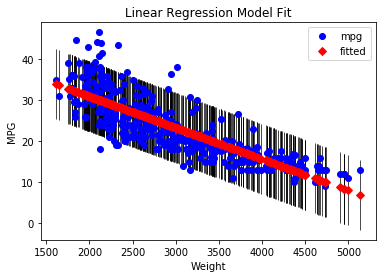

In [15]:
fig, ax = plt.subplots()
fig = sm.graphics.plot_fit(results, 1, ax=ax)
ax.set_ylabel("MPG")
ax.set_xlabel("Weight")
ax.set_title("Linear Regression Model Fit")
plt.show()

**(d) Plot the residuals vs. fitted values. Comment on any problems you see with the fit.**

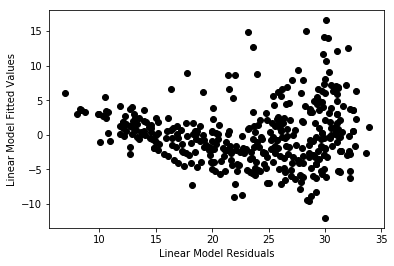

In [16]:
fig, ax = plt.subplots()
fig = plt.scatter(results.fittedvalues, results.resid, c="black")
ax.set_ylabel("Linear Model Fitted Values")
ax.set_xlabel("Linear Model Residuals")
ax.set_title("")
plt.show()

We can see clearly that the residuals are not constant as the spread of the fitted models increases with higher residuals. This indicates non-constant variance and hints at the fact that the underlying relationship may not be linear, as the assumptions for this analysis may not be met.

### Exercise 3

**Exercise 3.9 in Chapter 3 of *An Introduction to Statistical Learning* (in Python): This question involves the use of multiple linear regression on the `Auto` data set. **

**(a) Produce a scatterplot matrix which includes all of the variables in the data set using `pandas.plotting.scatter_matrix`.**

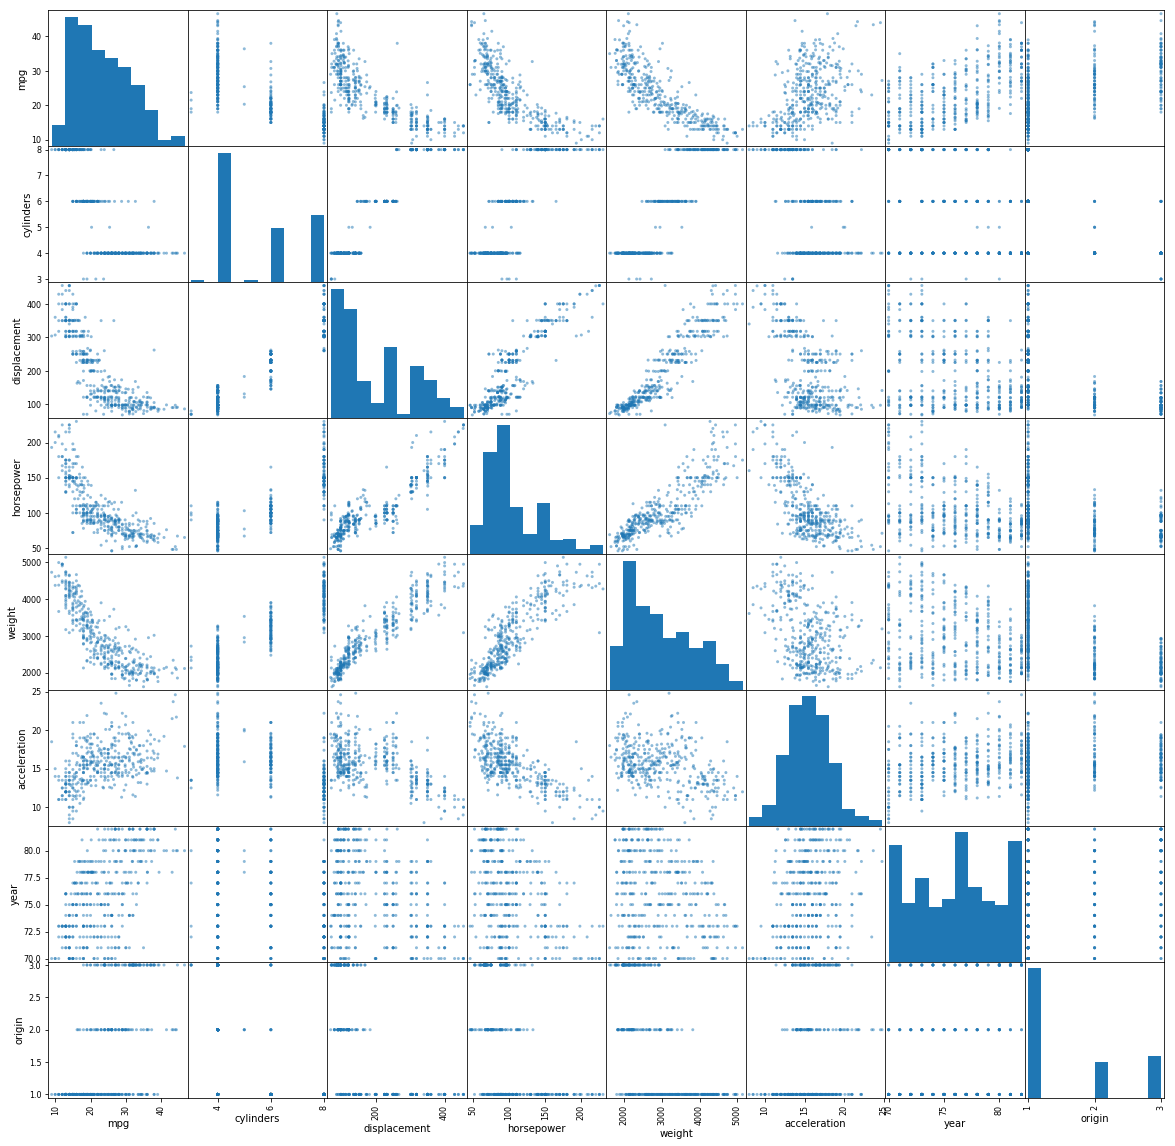

In [17]:
pd.plotting.scatter_matrix(auto, figsize=(20,20))
plt.show()

**(b) Compute the matrix of correlations between the variables using the `corr()` attribute in Pandas. **

In [18]:
auto.corr(method = "pearson")

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


**(c) Use the `OLS` function from the `statsmodels` package to perform a multiple linear regression with `mpg` as the response and all other variables except `name` as the predictors. Be sure to include an intercept. Print the results. Comment on the output. For instance:  **
<space><space>**(i) Is there a relationship between the predictors and the response?  **
<space><space>**(ii) Which predictors appear to have a statistically significant relationship to the response?  **
<space><space>**(iii) What does the coefficient for the year variable suggest?**

In [19]:
X = auto[["displacement", "cylinders", "horsepower", "weight", "acceleration", "year", "origin"]]
y = auto["mpg"]
X = sm.add_constant(X) # adds intercept
mulModel = sm.OLS(y, X)
mulResults = mulModel.fit()
print(mulResults.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Thu, 18 Apr 2019   Prob (F-statistic):          2.04e-139
Time:                        22:22:24   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

Here we see how the different predictors interact with gas mileage. The number of cylinders, horsepower and weight all have negative relationships with mpg, while displacement, acceleration, year and origin have positive relationships which is consistent to what we saw in Homework 1. There are varying degrees of significance for these difference parameters.  

The R-squared value is higher with these additional parameters, telling us the included variables account fo over 82% of the variability in miles per gallon.  

The probability is again very low, at 2.04e-139. This is below the typical cutoff of 0.05 for statistical significance so we can say there is a relationship between the predictors and the response.  

Using a cutoff of 0.05, the intercept, displacement, weight, year and origin have a statistically significant relationship with the response variable which is mpg in this case.  

The coefficient for the year variable is 0.75. This is telling us that there is a positive relationship between year and mpg, as we expect since newer cars should have better gas mileage. The number tells us that holding everything else constant, a car made a year later should get 0.7508 more miles to the gallon than a car made a year prior. 

**(d) Plot the residuals vs. fitted values. Comment on any problems you see with the fit.**

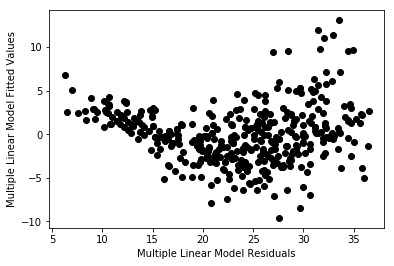

In [20]:
fig, ax = plt.subplots()
fig = plt.scatter(mulResults.fittedvalues, mulResults.resid, c="black")
ax.set_ylabel("Multiple Linear Model Fitted Values")
ax.set_xlabel("Multiple Linear Model Residuals")
ax.set_title("")
plt.show()

Again, we see the plot of residuals and fitted values indicating that the data is non-linear. This is because the spread of the residuals are not constant. This indicates the underlying data may not display a linear relationship which is necessary for our model to produce useful output.

**(e) Statsmodels allows you to fit models using R-style formulas. See `http://www.statsmodels.org/dev/example_formulas.html`. Use the * and : symbols to fit linear regression models with interaction effects. Do any interactions appear to be statistically significant?**

In [21]:
intModel = smf.ols(formula = "mpg ~ displacement * cylinders * horsepower * weight * acceleration * year * origin", data = auto)
intResults = intModel.fit()
print(intResults.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     38.51
Date:                Thu, 18 Apr 2019   Prob (F-statistic):          1.50e-123
Time:                        22:22:25   Log-Likelihood:                -838.24
No. Observations:                 392   AIC:                             1880.
Df Residuals:                     290   BIC:                             2286.
Df Model:                         101                                         
Covariance Type:            nonrobust                                         
                                                                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

Now, accounting for the interactions between parameters and using a threshold of 0.05, none of the p-values for any combination of predictors fall under this and therefore no interactions appear to be statistically significant. This makes sense as the correlation matrix indicated that some of our variables are highly correlated, such as displacement and cylinders who have a correlation value of more than 0.9 and a p-value of 0.182 in this output. However, the F-statistic for the model as a whole is 1.50e-123 and would be considered significant.

**(f)Try a few different transformations of the variables, such as $log(X)$, $\sqrt(X)$, ${X}^2$. Comment on your findings. **


In [22]:
intModel = smf.ols(formula = "mpg ~ np.log(displacement) * np.log(cylinders) * np.log(horsepower) * np.log(weight) * np.log(acceleration) * np.log(year) * np.log(origin)", data = auto)
intResults = intModel.fit()
print(intResults.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     34.77
Date:                Thu, 18 Apr 2019   Prob (F-statistic):          3.74e-117
Time:                        22:22:25   Log-Likelihood:                -830.96
No. Observations:                 392   AIC:                             1888.
Df Residuals:                     279   BIC:                             2337.
Df Model:                         112                                         
Covariance Type:            nonrobust                                         
                                                                                                                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [23]:
sqrtModel = smf.ols(formula = "mpg ~ np.sqrt(displacement) * np.sqrt(cylinders) * np.sqrt(horsepower) * np.sqrt(weight) * np.sqrt(acceleration) * np.sqrt(year) * np.sqrt(origin)", data = auto)
sqrtResults = sqrtModel.fit()
print(sqrtResults.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     34.21
Date:                Thu, 18 Apr 2019   Prob (F-statistic):          2.91e-116
Time:                        22:22:25   Log-Likelihood:                -833.93
No. Observations:                 392   AIC:                             1894.
Df Residuals:                     279   BIC:                             2343.
Df Model:                         112                                         
Covariance Type:            nonrobust                                         
                                                                                                                                       coef    std err          t      P>|t|      [0.025      0.975]
-------------

In [24]:
sqModel = smf.ols(formula = "mpg ~ displacement**2 * cylinders**2 * horsepower**2 * weight**2 * acceleration**2 * year**2 * origin**2", 
                  data = auto)
sqResults = sqModel.fit()
print(sqResults.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     38.51
Date:                Thu, 18 Apr 2019   Prob (F-statistic):          1.50e-123
Time:                        22:22:25   Log-Likelihood:                -838.24
No. Observations:                 392   AIC:                             1880.
Df Residuals:                     290   BIC:                             2286.
Df Model:                         101                                         
Covariance Type:            nonrobust                                         
                                                                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

Even with all of the transformations, none of the interactions appear to be statistically significant, with their p-values all falling above the 0.05 cutoff. However, we see the probability from the F-statistic in all three transformations remains significant, as it is far below the 0.05 cutoff. Additionally, the R-squared values for all three transformations are high, with the log transform producing a value of 0.933, and thus indicating that the model explains over 93% of the model variability.

### Exercise 4

**Exercise 3.12 in Chapter 3 of _An Introduction to Statistical Leanring_ (in Python): This problem involves simple linear regression without an intercept. **

**(a) Recall that the coefficient estimate *β* for the linear regression of *Y* onto *X* without an intercept is given by (3.38). Under what circumstance is the coefficient estimate for the regression of *X* onto *Y* the same as the coefficient estimate for the regression of *Y* onto *X*?**

Equation 3.38 gives us:  
$\hat{\beta} = (\sum_{i=1}^{n} x_i y_i) / (\sum_{i'=1}^{n} x_{i'}^2)$

For $\beta$ to be equal for Y onto X without an intercept and X onto Y we would need the following to hold:  
$(\sum_{i=1}^{n} x_i y_i) / (\sum_{i'=1}^{n} x_{i'}^2) = (\sum_{i=1}^{n} y_i x_i) / (\sum_{i'=1}^{n} y_{i'}^2)$  

We can multiply this out for clarity:  
$(\sum_{i=1}^{n} x_i y_i) (\sum_{i'=1}^{n} y_{i'}^2) = (\sum_{i=1}^{n} y_i x_i)(\sum_{i'=1}^{n} x_{i'}^2)$   

Since the order of multiplication does not alter the outcome, the $\sum_{i=1}^{n} x_i y_i$ and $\sum_{i=1}^{n} y_i x_i$ terms cancel. This leaves us with:  
$\sum_{i'=1}^{n} y_{i'}^2 = \sum_{i'=1}^{n} x_{i'}^2$   

Therefore, for the coefficient estimate $\beta$ to be equal for both the regression of X onto Y and the regression of Y onto X, the sum of squares for X and Y must be equivalent. It is important to note that if the sum of squares for X and/or Y is 0, that the equation for $\beta$ will be undefined as the denominator will be 0, so therefore this is not a valid solution.

**(b) Generate an example in Python with _n = 50_ observations in which the coefficient estimate for the regression of *X* onto *Y* is different from the coefficient estimate for the regression of *Y* onto *X*.**

In [25]:
X = np.random.rand(25, 2) # 25 x 2 matrix of random numbers
Y = np.random.rand(25, 2) 

modelYX = sm.OLS(Y, X)
coeffYX = modelYX.fit().params

modelXY = sm.OLS(X, Y)
coeffXY = modelXY.fit().params

df = pd.DataFrame([[coeffYX[0][0], coeffYX[0][1], coeffYX[1][0],coeffYX[1][1]], 
                   [coeffXY[0][0], coeffXY[0][1], coeffXY[1][0], coeffXY[1][1]]], 
                  index = ["Regression Y onto X", "Regression X onto Y"], 
                  columns = ["Beta 0,0", "Beta 0,1", "Beta 1,0", "Beta 1,1"])
display(df)

,"Beta 0,0","Beta 0,1","Beta 1,0","Beta 1,1"
Regression Y onto X,0.421247,0.631853,0.605022,0.533343
Regression X onto Y,0.241710,0.594282,0.415522,0.273492


**(c) Generate an example in Python with _n = 50_ observations in which the coefficient estimate for the regression of *X* onto *Y* is the same as the coefficient estimate for the regression of *Y* onto *X*.**

In [26]:
X = [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]]

Y = [[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]

modelYX = sm.OLS(Y, X)
coeffYX = modelYX.fit().params

modelXY = sm.OLS(X, Y)
coeffXY = modelXY.fit().params

df = pd.DataFrame([[coeffYX[0][0], coeffYX[0][1], coeffYX[1][0],coeffYX[1][1]], 
                   [coeffXY[0][0], coeffXY[0][1], coeffXY[1][0], coeffXY[1][1]]], 
                  index = ["Regression Y onto X", "Regression X onto Y"], 
                  columns = ["Beta 0,0", "Beta 0,1", "Beta 1,0", "Beta 1,1"])
display(df)

,"Beta 0,0","Beta 0,1","Beta 1,0","Beta 1,1"
Regression Y onto X,0.032,0.032,0.032,0.032
Regression X onto Y,0.032,0.032,0.032,0.032
